# Student Alcohol Consumption and Marks in Mathematics

In this notebook, we are going to analyse the alcohol consumption of some students and their marks in mathematics. This is a very interesting dataset and problem, as we know how college students' drinking habits are and finding some predictions of their grades on the basis of their drinking habits is very fascinating. Let's see what kind of results we are able to get at the end of this project.

# 1. Problem
In this project, we have to predict the grades of students using the data availabe regarding their alcohol consumption and some other features. The grades are in the form of numbers, hence this is a regression problem.

# 2. Data
The data for this problems is taken from Kaggle. It consists of data related to students in two Portoguese colleges, which includes their family details, some extra-curricular activities and ofcourse, drinking habits. Full description of features:
    
    1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
    
    2. sex - student's sex (binary: 'F' - female or 'M' - male)
    
    3. age - student's age (numeric: from 15 to 22)
    
    4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
    
    5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
    
    6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
    
    7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary       education or 4 – higher education)
    
    8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    
    9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    
    10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    
    11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    
    12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
    
    13. traveltime - home to school travel time (numeric: 1 - 1 hour)
    
    14. studytime - weekly study time (numeric: 1 - 10 hours)
    
    15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
    
    16. schoolsup - extra educational support (binary: yes or no)
    
    17. famsup - family educational support (binary: yes or no)
    
    18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
    
    19. activities - extra-curricular activities (binary: yes or no)
    
    20. nursery - attended nursery school (binary: yes or no)
    
    21. higher - wants to take higher education (binary: yes or no)
    
    22. internet - Internet access at home (binary: yes or no)
    
    23. romantic - with a romantic relationship (binary: yes or no)
    
    24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
    
    25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
    
    26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
    
    27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
    
    28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
    
    29. health - current health status (numeric: from 1 - very bad to 5 - very good)
    
    30. absences - number of school absences (numeric: from 0 to 93)
    
The predicting values are:

    1. G1 - first period grade(1-20)
    
    2. G2 - second period grade(1-20)
    
    3. G3 - final grade(1-20)

In this project, we will predict only final grade, hence first period and second period grade will be treated as features.

Link to the dataset : https://www.kaggle.com/uciml/student-alcohol-consumption/download

# 3. Evaluation 
Since this is a regression problem, the model will be evaluated on metrics like Mean Absolute Error(MAE), Mean Squared Error(MSE), R^2 score and some more. In the end, the model with high accuracy and decent scores on these metrics will be chosen.

# 4. Data Analysis
Let's analyse the data, make some visualization and find which features are more relevant for our problem.

In [397]:
# Import some important tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [398]:
# Import .csv file containing data
data_df = pd.read_csv("student-mat.csv")
data_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Some information regarding the dataset

In [399]:
data_df.shape

(395, 33)

In [400]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [401]:
data_df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Our dataset has no null values, so that is one relief. Also, it has a lot of categorical features.

In [402]:
data_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Let's make some visualizations on the dataset

In [403]:
data_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


We have to use a lot of histograms on this dataset, hence let's make a function which we can use to make histograms with some colours which show the total fraction of data in a bin.

## Visualizations

In [404]:
# Function to make colored histograms
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
def color_hist(data,n_bins = 20):
    fig,ax = plt.subplots(tight_layout = True)
    N,bins,patches = ax.hist(data,bins = n_bins)
    fracs = N/N.max()
    norm = colors.Normalize(fracs.min(),fracs.max())
    for thisfrac,thispatch in zip(fracs,patches):    # Normalizing the fraction of data in each bin and giving color to each bin according to that
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)
    ax.axvline(x = data.mean(),color='r')  # To show where the mean lies even if the plot looks a bit skewed due to number of bins

16.696202531645568

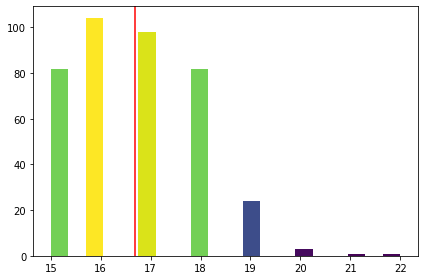

In [405]:
# Plotting age of students
color_hist(data_df["age"]);
data_df["age"].mean()

A lot of students are in the age group 15-19 and the mean age is 16.7 years, along with most students in the data set aged 16 amd 17.

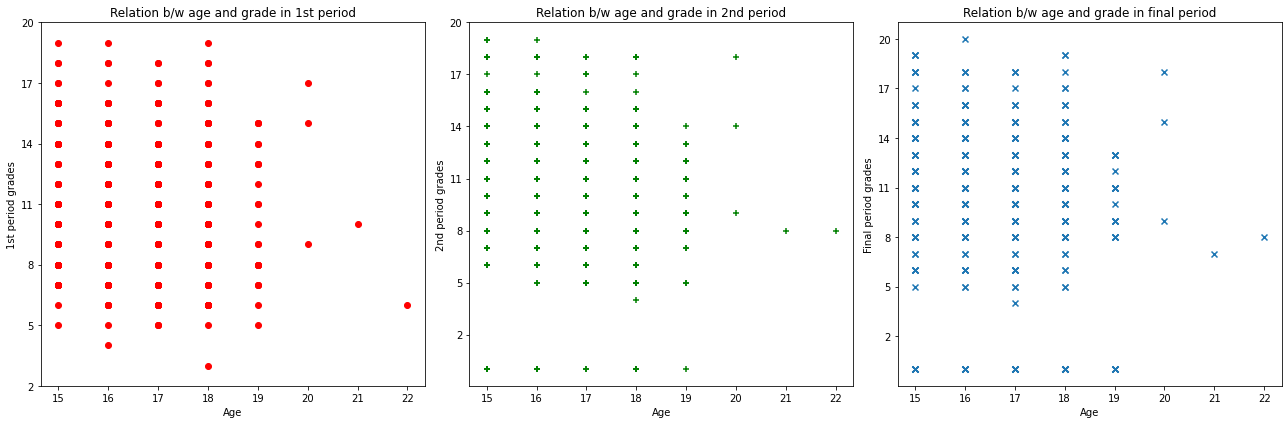

In [406]:
# Relation between grades in all 3 periods and age
fig,ax = plt.subplots(1,3,tight_layout = True,figsize = (18,6))
ax[0].scatter(data_df["age"],data_df["G1"],color = 'r')
ax[0].set(title = "Relation b/w age and grade in 1st period",
          xlabel = "Age",
          ylabel = "1st period grades",
          yticks = np.arange(2,22,3))
ax[1].scatter(data_df["age"],data_df["G2"],color = 'g',marker = '+')
ax[1].set(title = "Relation b/w age and grade in 2nd period",
          xlabel = "Age",
          ylabel = "2nd period grades",
          yticks = np.arange(2,22,3))
ax[2].scatter(data_df["age"],data_df["G3"],marker = 'x')
ax[2].set(title = "Relation b/w age and grade in final period",
          xlabel = "Age",
          ylabel = "Final period grades",
          yticks = np.arange(2,22,3));

This plot show that in all periods, students in the age range of 15-18 scored higher than others.

In [407]:
obj_cols = []
for column in data_df.columns.tolist():
    if data_df[column].dtype == 'object':
        obj_cols.append(column)

In [408]:
obj_cols

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

Now we have all the column names which have 'object' data. Using them we can draw bar plots for all such features in one go

In [409]:
len(obj_cols)

17

C:\Users\ankit\Desktop\student-alcohol-cons-proj\env\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


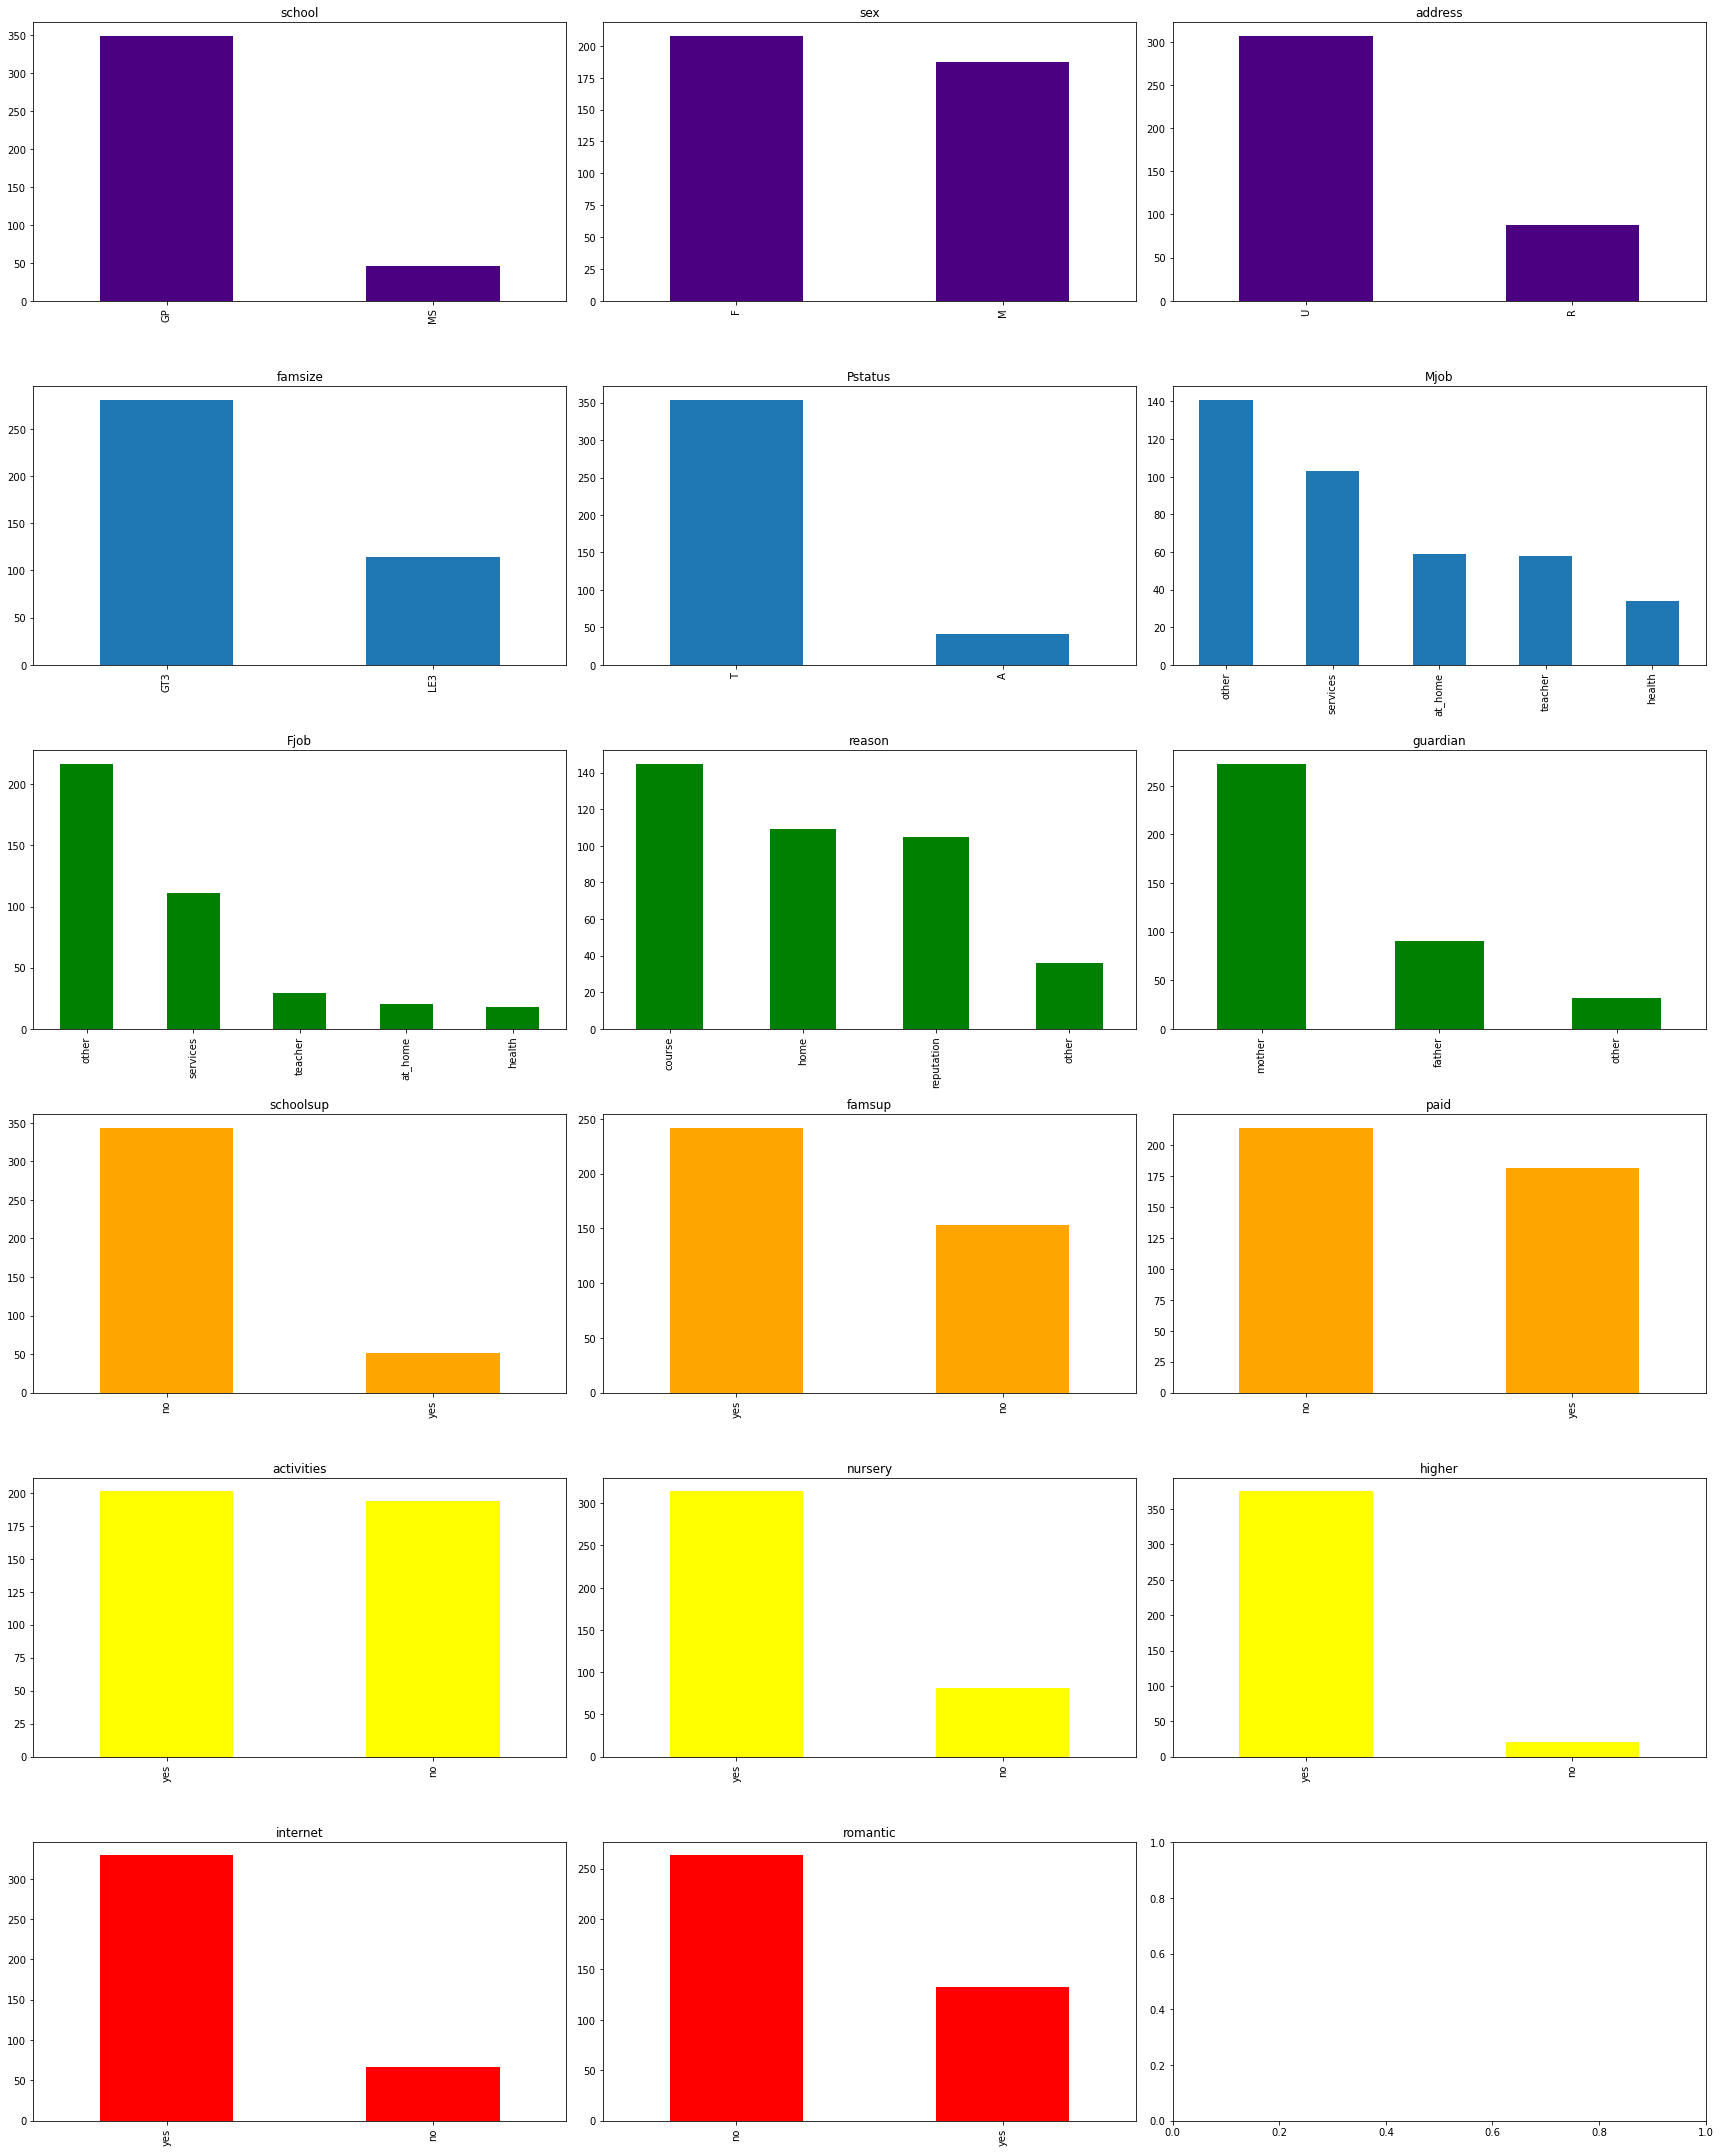

In [410]:
# Plotting all object columns in one go
fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,3,figsize = (24,30),tight_layout = True)
for i,obj in enumerate(data_df[obj_cols]):
    if i<3:
        data_df[obj].value_counts().plot(kind = "bar",ax = ax1[i],color = 'indigo').set_title(obj)
    elif i>=3 and i<6:
        data_df[obj].value_counts().plot(kind = "bar",ax = ax2[abs(3-i)]).set_title(obj)
    elif i>=6 and i<9:
        data_df[obj].value_counts().plot(kind = "bar",ax = ax3[abs(6-i)],color = "green").set_title(obj)
    elif i>=9 and i<12:
        data_df[obj].value_counts().plot(kind = "bar",ax = ax4[i-9],color = "orange").set_title(obj)
    elif i>=12 and i<15:
        data_df[obj].value_counts().plot(kind = "bar",ax = ax5[i-12],color = "yellow").set_title(obj)
    else:
        data_df[obj].value_counts().plot(kind = "bar",ax = ax6[i-15],color = "red").set_title(obj)
fig.show();

Observations made from these bar plots:
    
1. Most students attend GP(Gabriel Pereira) school
2. There are a bit more female students as compared to male students
3. Most students live in urban areas
4. Most students' family has more than 3 members
5. A lot of students' parents are living together
6. Most of the students' mother work in the service sector, same applies for the father
7. Most students cite course as the reason of enrolling in their school
8. Most students' having listed their mother as their guardian
9. A lot of students do not have extra educational support other than the school
10. A lot of them are supported by their families(financially and educationally)
11. Most of them do not take extra paid courses
12. Equal number of students engage and do not engage in extra curricular activities
13. Most of them have attended nursery
14. A lot of them want to go for higher education
15. A lot of them have internet connectivity
16. Most of them are not in a romantic relationship(so sad)

Let's make now some visulizations on numerical data

In [411]:
data_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


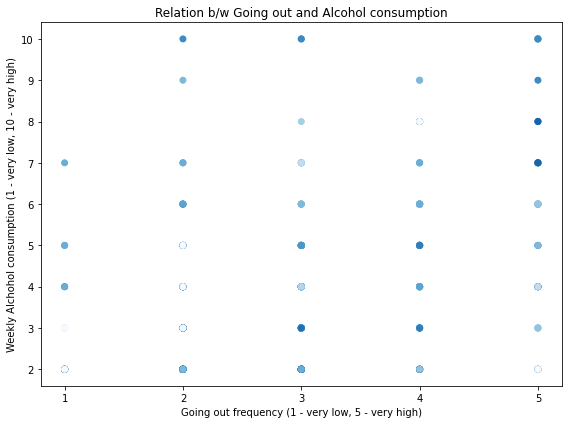

In [412]:
# Relation between goout and alcohol consumption w.r.t. final grade
data_df["Alc"] = data_df["Dalc"] + data_df["Walc"]
fig,ax = plt.subplots(tight_layout = True,figsize = (8,6))
ax.scatter(data_df["goout"],data_df["Alc"],c = data_df["G3"],cmap = 'Blues')
ax.set(title = "Relation b/w Going out and Alcohol consumption",
      xlabel = "Going out frequency (1 - very low, 5 - very high)",
      ylabel = "Weekly Alchohol consumption (1 - very low, 10 - very high)",
      xticks = [1,2,3,4,5]);

This plot shows that people who go out a lot or those who drink a lot generally score low. However, there are enough instances where people who go out a lot and drink a lot have scored higher in final test. Students who go out less and drink moderately score a bit lower.

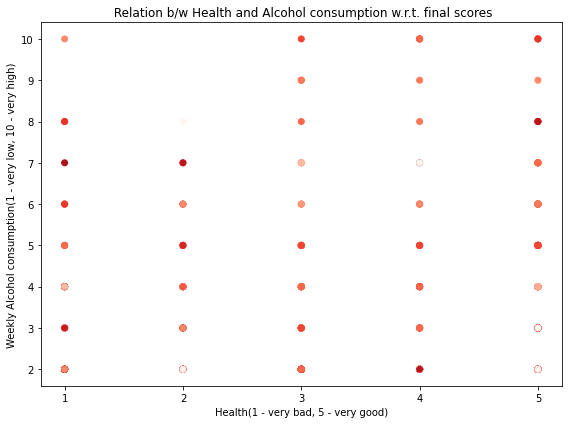

In [413]:
# Relation between Health and Alcohol consumption w.r.t final period scores
fig,ax = plt.subplots(tight_layout = True,figsize = (8,6))
ax.scatter(data_df["health"],data_df["Alc"],c = data_df["G3"],cmap = "Reds")
ax.set(title = " Relation b/w Health and Alcohol consumption w.r.t. final scores",
       xlabel = "Health(1 - very bad, 5 - very good)",
       ylabel = "Weekly Alcohol consumption(1 - very low, 10 - very high)",
       xticks = [1,2,3,4,5]);

This plot shows that in general, people who drink a lot have poor health, but still get good grades. Also, students with very good health and low alcohol consumption have poor grades. Students with both good health and high alcohol consumption have good grades.

The earlier plot had an interesting point about students with very good health and low alcohol consumption. There can be a possibility that these students may be college athletes. Let's find this out by plotting with extra-curricular activities.

In [414]:
data_df["activities"].replace(['yes','no'],[0,1])

0      1
1      1
2      1
3      0
4      1
      ..
390    1
391    1
392    1
393    1
394    1
Name: activities, Length: 395, dtype: int64

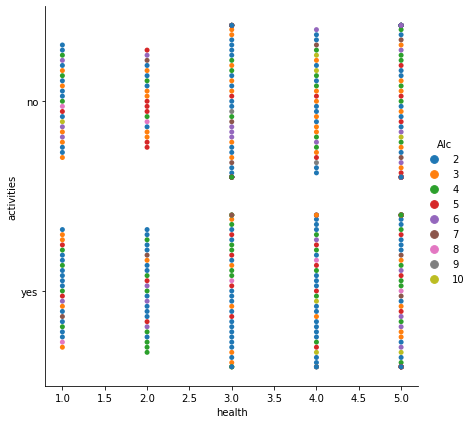

In [415]:
# Plotting relation b/w activities and health w.r.t alcohol consumption
import seaborn as sns
sns.catplot(x = 'health',y = 'activities',kind = 'swarm',hue = 'Alc',data = data_df,height = 6);

Although this doesn't conclude that students who engage in extra-curricular activities and drink less are athletes, but they necessarily drink a lot less than those who don't. Hence, extra-curricular activities are an indicator for a student drinking less.

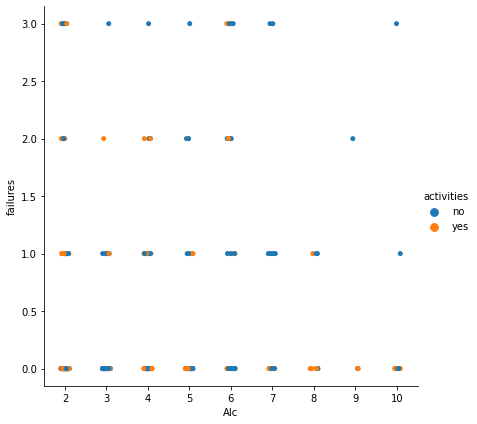

In [416]:
# Relation b/w class failures and alcohol consumption w.r.t extra-curricular activities
sns.catplot(x = 'Alc',y = 'failures',hue = 'activities',data = data_df,height = 6)

The number of failures is seen higher in students who do not engage in any exta activity and have moderate alcohol consumption. Students with very high alcohol consumption have less number of failures.

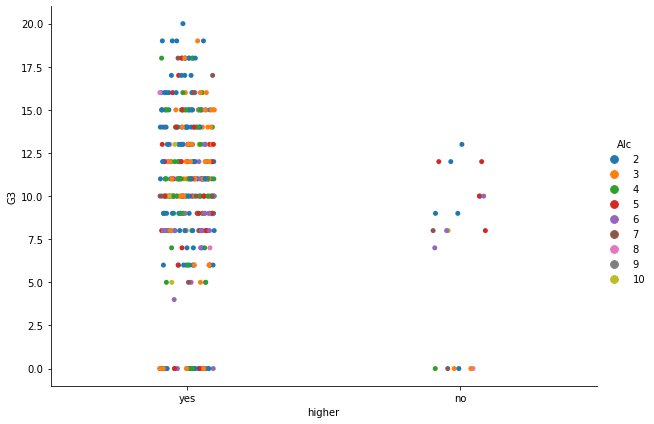

In [417]:
# Relation b/w higher education pursuit and final grades w.r.t alcohol consumption
sns.catplot(x = 'higher',y = 'G3',hue = 'Alc',data = data_df, height = 6, aspect =11.7/8.27 );

Students who want to pursue higher education have mixed alcohol consumptions. 
Students who do not want to pursue higher education, even though very less of them, have high alcohol consumption.

In [418]:
data_df["romantic"].replace(['yes','no'],[1,0])

0      0
1      0
2      0
3      1
4      0
      ..
390    0
391    0
392    0
393    0
394    0
Name: romantic, Length: 395, dtype: int64

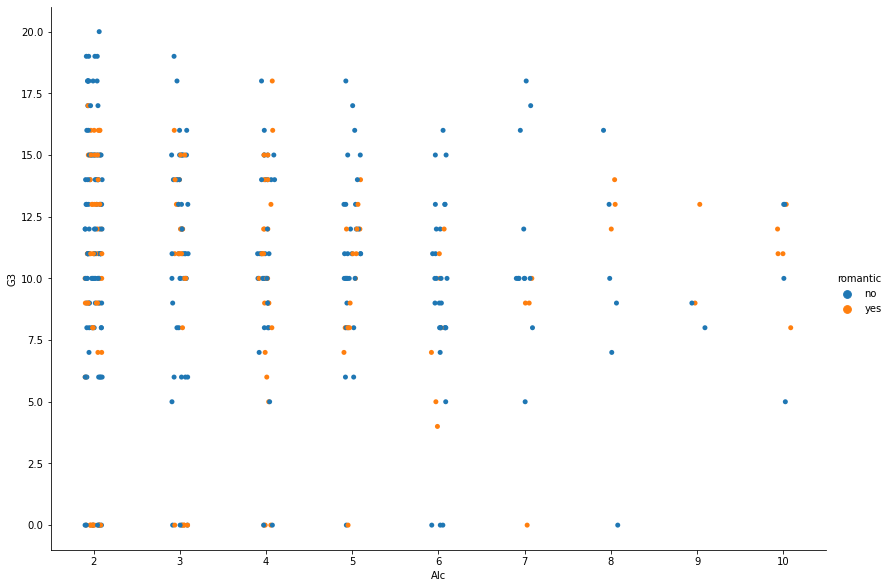

In [419]:
# Relation b/w alcohol consumption and final grades, w.r.t relationship status
sns.catplot(x = 'Alc',y = 'G3',hue = 'romantic',data = data_df,height = 8.27, aspect = 11.7/8.27);

Students in romantic relationships tend to have high alcohol consumption. Also, students with above average grades have low to moderate alcohol consumption and don't have romantic relationships. This can be a significant indicator of higher grades.

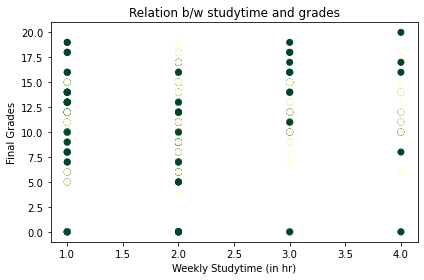

In [420]:
# Relation b/w grades and studytime w.r.t. extra paid classes 
fig,ax  = plt.subplots(tight_layout = True)
ax.scatter(data_df["studytime"],data_df["G3"],c = data_df["paid"].replace(['yes','no'],[0,1]),cmap = 'YlGn')
ax.set(title = "Relation b/w studytime and grades",
       xlabel = "Weekly Studytime (in hr)",
       ylabel = "Final Grades");

A lot of students who do not give much time for study and yet bring good grades are enrolled in paid extra classes and vice versa. Students who get very poor grades are likely to join paid extra classes.

In [421]:
data_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Alc
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,2
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,5
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,3


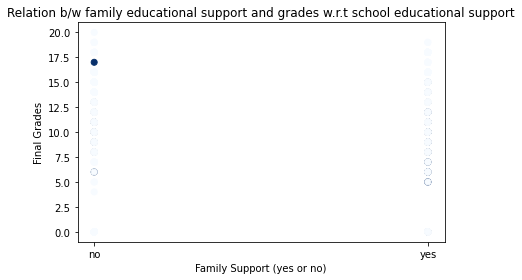

In [422]:
# Relation between family education support and grades w.r.t school support
fig,ax = plt.subplots(tight_layout = True)
ax.scatter(data_df["famsup"],data_df["G3"],c = data_df["schoolsup"].replace(['yes','no'],[1,0]),cmap = "Blues")
ax.set(title = "Relation b/w family educational support and grades w.r.t school educational support",
       xlabel = "Family Support (yes or no)",
       ylabel = "Final Grades");

This shows that grades are evenly distributed among students who have family support and those who don't. There is only one student with school support who has scored good grades that too without family support. Hence this doesn't have much relevance to a student's academic success.

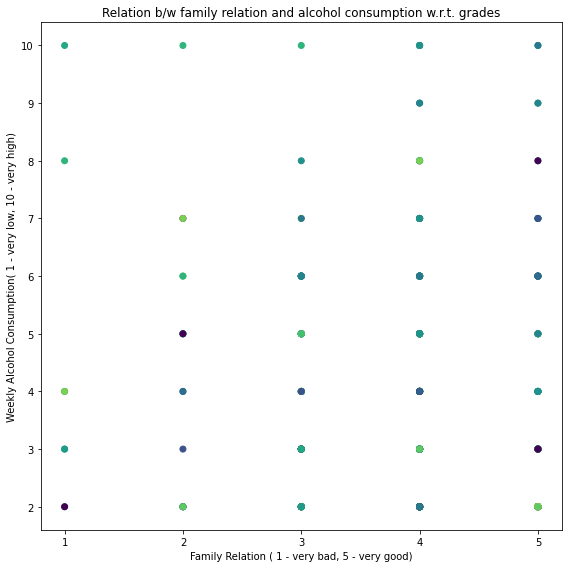

In [423]:
# Relation b/w family relation and alcohol consumption w.r.t. grades
fig,ax = plt.subplots(tight_layout = True,figsize = (8,8))
ax.scatter(data_df["famrel"],data_df["Alc"],c = data_df["G3"],cmap = "viridis")
ax.set(title = "Relation b/w family relation and alcohol consumption w.r.t. grades",
       xlabel = "Family Relation ( 1 - very bad, 5 - very good)",
       ylabel = "Weekly Alcohol Consumption( 1 - very low, 10 - very high)")
ax.set_xticks([1,2,3,4,5]);

Most of the students who have good family relations have moderate drinking habits and average grades. Students with poorer family relations tend to have poorer grades and moderate to low alcohol consumption.

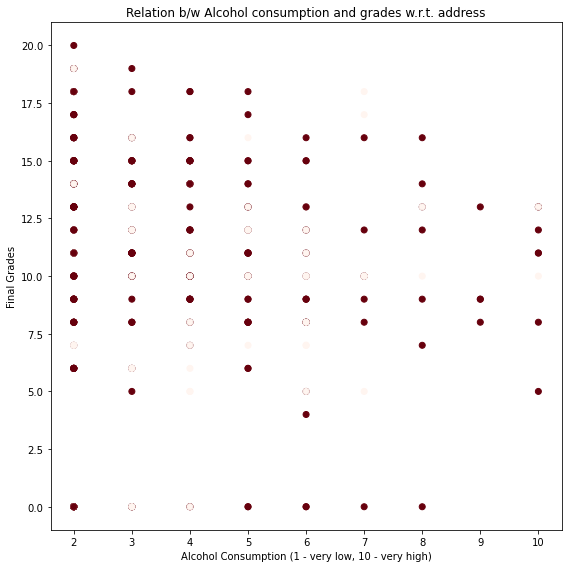

In [424]:
# Relation between alcohol consumption and grades w.r.t address
fig,ax = plt.subplots(tight_layout = True,figsize = (8,8))
ax.scatter(data_df["Alc"],data_df["G3"],c = data_df["address"].replace(['U','R'],[1,0]), cmap = 'Reds')
ax.set(title = "Relation b/w Alcohol consumption and grades w.r.t. address",
       xlabel = "Alcohol Consumption (1 - very low, 10 - very high)",
       ylabel = "Final Grades");

Most students who have higher grades have low alchol cosumption and live in urban areas. This is a serious indicator for higher grades.

In [425]:
data_df["G1"].groupby(data_df["sex"]).median()

sex
F    10
M    11
Name: G1, dtype: int64

In [426]:
data_df["G2"].groupby(data_df["sex"]).median()

sex
F    10
M    11
Name: G2, dtype: int64

In [427]:
data_df["G3"].groupby(data_df["sex"]).median()

sex
F    10
M    11
Name: G3, dtype: int64

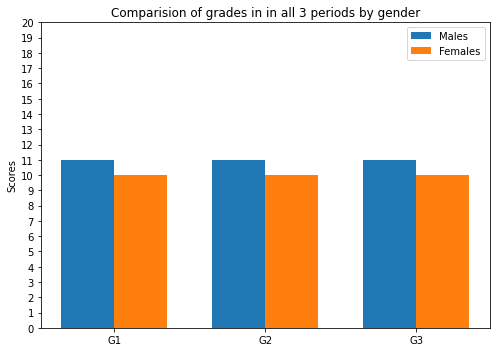

In [428]:
# Comparing all 3 periods' scores by gender
labels = ['G1','G2','G3']
m_means = [11,11,11]  # Median grades of males and females
w_means = [10,10,10]

x = np.arange(len(labels)) # Location of labels
width = 0.35

fig,ax = plt.subplots(tight_layout = True,figsize = (7,5))
rects1 = ax.bar(x - width/2,m_means,width,label = "Males")
rects2 = ax.bar(x + width/2,w_means,width,label = "Females")

ax.set(title = "Comparision of grades in in all 3 periods by gender",
       ylabel = "Scores",
       xticks = x,
       yticks = np.arange(21),
       xticklabels = labels)
ax.legend();

This plot shows that men have scored slightly better than women in all 3 periods. Let's see grades of men and women w.r.t. drinking habits. Also men and women score average grades in these schools.

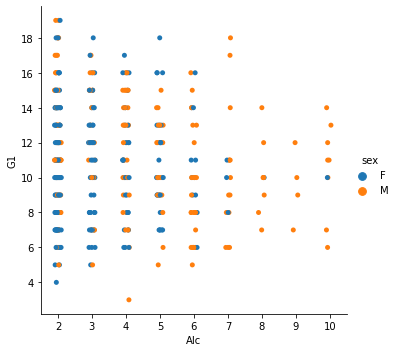

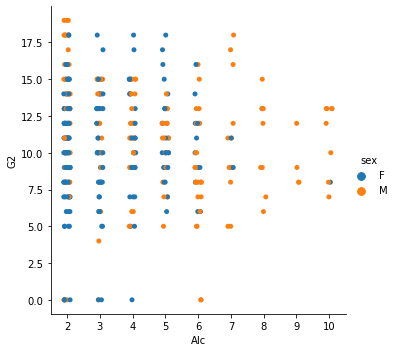

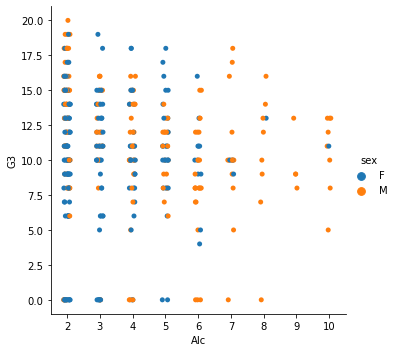

In [429]:
# Comparing grades in all 3 periods based on gender w.r.t. alcohol consumption
sns.catplot(x = 'Alc',y = 'G1',hue = 'sex', data = data_df,orient='v')
sns.catplot(x = 'Alc',y = 'G2',hue = 'sex', data = data_df,orient='v')
sns.catplot(x = 'Alc',y = 'G3',hue = 'sex', data = data_df,orient='v');

In all three plots, we can see that a large number of males have high weekly alcohol consumption and those men don't score very high grades. Meanwhile, a lot of females have low to moderate consumption and score higher grades.

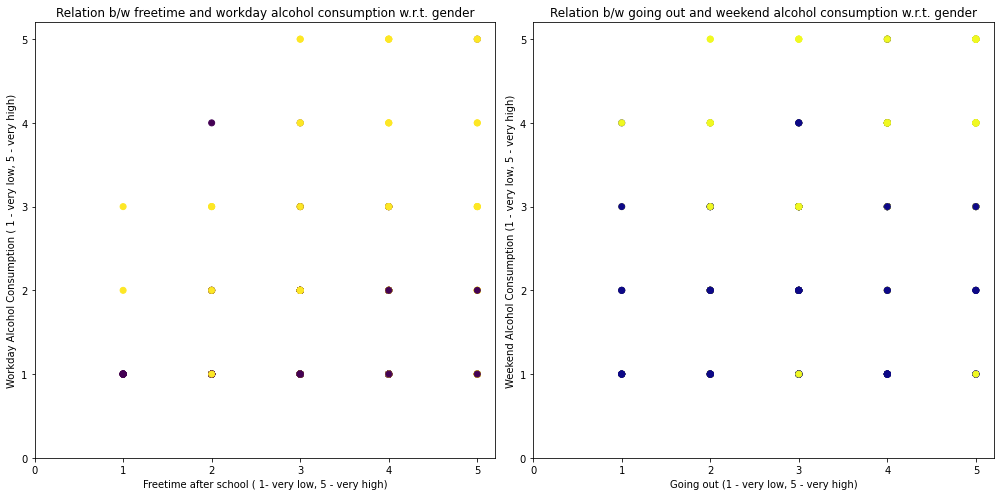

In [430]:
# Relation between freetime and workday alcohol consumption, going out and weekend alcohol consumption w.r.t gender
fig,ax = plt.subplots(1,2,tight_layout = True,figsize = (14,7))
ax[0].scatter(data_df["freetime"],data_df["Dalc"],c = data_df["sex"].replace(['M','F'],[1,0]),cmap = 'viridis')
ax[0].set(title = "Relation b/w freetime and workday alcohol consumption w.r.t. gender",
          xlabel = "Freetime after school ( 1- very low, 5 - very high)",
          ylabel = "Workday Alcohol Consumption ( 1 - very low, 5 - very high)",
          xticks = np.arange(6),
          yticks = np.arange(6))
ax[1].scatter(data_df["goout"],data_df["Walc"],c = data_df["sex"].replace(['M','F'],[1,0]),cmap = 'plasma')
ax[1].set(title = "Relation b/w going out and weekend alcohol consumption w.r.t. gender",
          xlabel = "Going out (1 - very low, 5 - very high)",
          ylabel = "Weekend Alcohol Consumption (1 - very low, 5 - very high)",
          xticks = np.arange(6),
          yticks = np.arange(6));

Women tend to have less freetime after school and drink less alcohol on weekdays and vice verse for men.
Both men and women go out almost the same number of times in a week and drink almost same amount of alcohol on weekends.

This kind of validates the previous plots which showed less alcohol consumption and higher grades for women as they spend more time studying during weekdays and don't drink that much on weekdays.

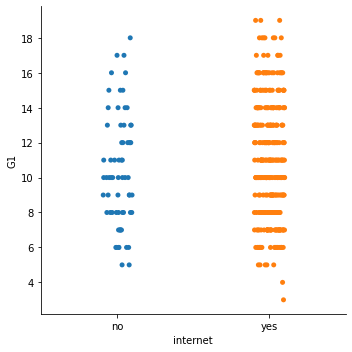

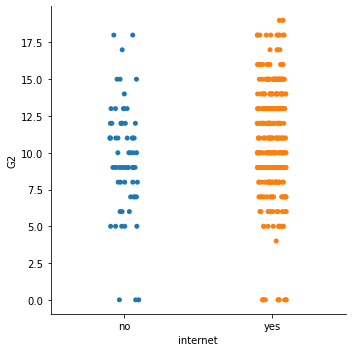

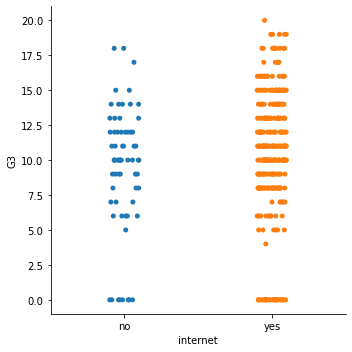

In [431]:
# Relation between scores in each period w.r.t. internet availability
ls = ['G1','G2','G3']
for i in range(3):
    sns.catplot(x = 'internet',y = ls[i],data = data_df);

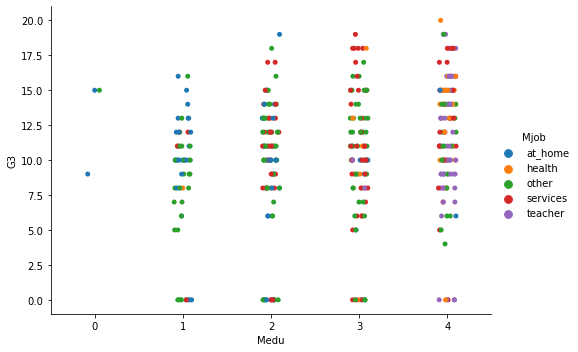

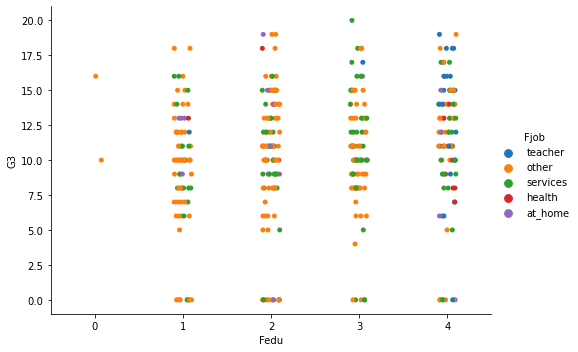

In [432]:
# Relation between grades and mother's and father's education w.r.t. mother's and father's education
sns.catplot(x = 'Medu',y = 'G3',data = data_df,hue = 'Mjob',aspect = 11.7/8.27,height = 5)
sns.catplot(x = 'Fedu',y = 'G3',data = data_df,hue = 'Fjob',aspect = 11.7/8.27,height = 5);

These plots show that students whose both parents have higher education and work as teacher or in government service score better grades. Also, a lot of fathers have listed their job as other. This is a significant factor in a student's grades.

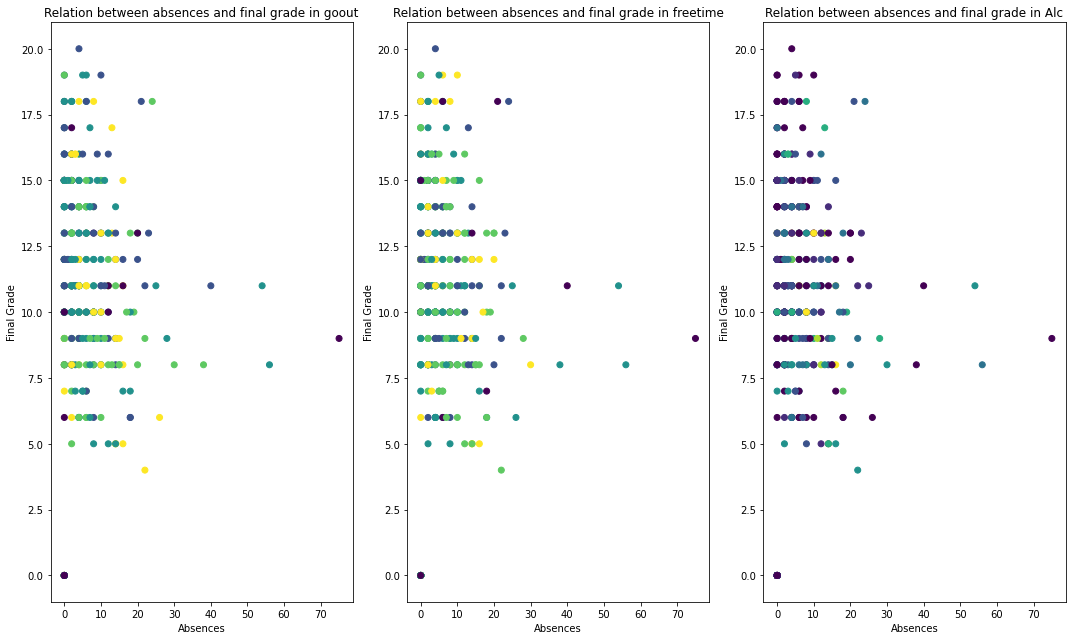

In [433]:
# Relation between absences and final grade w.r.t going out, freetime and weekly alcohol consumption
ls = ["goout","freetime","Alc"]
fig,ax = plt.subplots(1,3,tight_layout = True,figsize = (15,9))
for i in range(3):
    ax[i].scatter(data_df['absences'],data_df["G3"],c = data_df[ls[i]],cmap = 'viridis')
    head = "Relation between absences and final grade in "+ls[i]
    ax[i].set(title = head,
              xlabel = "Absences",
              ylabel = "Final Grade");

Points to noted from these graphs:

    1. Students who do less absents score good grades.
    2. There is no specific trend in student's going out frequency and final grades.
    3. Students who score good grades have more freetime.
    4. Students generally do some specific amount of absents despite alcohol consumption and grades.

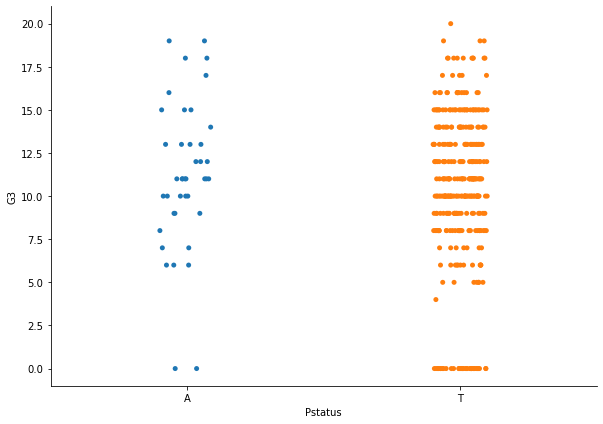

In [434]:
# Relation between parent's cohabitation situation and grades
sns.catplot(x = "Pstatus",y = "G3",data = data_df,height = 6,aspect = 11.7/8.27);

A lot of student's parents live together. However, grades are evenly distributed among the two groups.

### From all these plots, let's note down what are the important points we learnt about the data:

    1. Most students in the schools are in the age range of 15-18
    2. In all three periods, we can see that students in the age range of 15-18 score better grades as compared to other age groups
    3. Students who go out more and drink more score less, so do students who do not go out often and drink moderately. However, there are some outliers.
    4. Students with poor health and high alcohol consumption score better grades and vice versa. Students who have good health and high alcohol consumption score more.
    5. Engagement in extra curricular activities is an indicator of good health and low alcohol consumption.
    6. Failures are common in students who do not engage in exta curricular activities and have moderate alcohol consumption. Students with high alcohol consumption have less failures.
    7. Students who want to pursue higher studies have better grades.
    8. Students in romantic relationships have higher alcohol consumption. Students with low to moderate alcohol consumption having no romantic relationships have better grades.
    9. Students who do not spend time in self study but attend extra paid classes score better. Also, students score very low also take extra paid classes.
    10. Family and school education support doesn't really matter for a student's grades.
    11. Students with poorer family relations do not drink much and have better grades and vice versa.
    12. Students who live in urban areas and with low alcohol consumption score significantly higher than others.
    13. The median scores of males is slightly better than females. Also, female students have shown low alcohol consumption and better grades in all three periods.
    14. The drinking habits for males and females in weekends is pretty much same, along with going out frequency. However, during workday, females have less free time and tend to drink less than their counterparts.
    15. Most of students whose parents are working government jobs and are teachers score significantly higher than others.
    16. Also, the students who score a lot have mothers who are teachers.
    17. Students go out often in general but those who go out still have less absents.
    18. Some students who score a lot have moderate free time.
    19. Students who consume less alcohol and score more have very less absents.
    20. A lot of students have internet and those who have score better than those who don't.
    21. Parents' cohabitation status doesn't matter much to the score.

# 5. Modelling

We have a lot data which is not in numerical form, lets first encode them before modelling

In [435]:
# Splitting data into features and labels
X = data_df.drop('G3',axis = 1)
y = data_df["G3"]
X.head(),y.head()

(  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
 0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
 1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
 2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
 3     GP   F   15       U     GT3       T     4     2   health  services  ...   
 4     GP   F   16       U     GT3       T     3     3    other     other  ...   
 
   famrel freetime  goout  Dalc  Walc health absences  G1  G2 Alc  
 0      4        3      4     1     1      3        6   5   6   2  
 1      5        3      3     1     1      3        4   5   5   2  
 2      4        3      2     2     3      3       10   7   8   5  
 3      3        2      2     1     1      5        2  15  14   2  
 4      4        3      2     1     2      5        4   6  10   3  
 
 [5 rows x 33 columns],
 0     6
 1     6
 2    10
 3    15
 4    10
 Name: G3, dtype: int64)

In [436]:
# Label encoding our data
# Function for label encoding data
from sklearn.preprocessing import LabelEncoder
def label_encoding(data):
    for column in obj_cols:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
    return data

In [437]:
X1 = label_encoding(X)

In [438]:
X1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Alc
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,2
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,2
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,5
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,2
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,3


In [439]:
X = X1

In [440]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Alc
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,2
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,2
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,5
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,2
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,3


### Splitting data into train and test split
It is very important to split our data into train and test set, as it is very essential for modelling our data.

In [441]:
# Splitting data into train and test set
np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [442]:
X_train.shape,y_train.shape

((316, 33), (316,))

In [443]:
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Alc
181,0,1,16,1,0,1,3,3,3,2,...,4,2,3,1,2,3,2,12,13,3
194,0,1,16,1,0,1,2,3,2,2,...,5,3,3,1,1,3,0,13,14,2
173,0,0,16,1,0,1,1,3,0,3,...,4,3,5,1,1,3,0,8,7,2
63,0,0,16,1,0,1,4,3,4,1,...,3,4,4,2,4,4,2,10,9,6
253,0,1,16,0,0,1,2,1,2,2,...,3,3,2,1,3,3,0,8,9,4


### Selecting and training model
Since it is a regression problems, we must train and see how it performs in different models

In [444]:
# Making a evaluation function
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def evaluate(model,X_train,y_train,X_test,y_test):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {
        "Training R^2 score" : r2_score(y_train,train_preds),
        "Test R^2 score" : r2_score(y_test,test_preds),
        "Training MAE" : mean_absolute_error(y_train,train_preds),
        "Test MAE" : mean_absolute_error(y_test,test_preds),
        "Training MSE" : mean_squared_error(y_train,train_preds),
        "Test MSE" : mean_squared_error(y_test,test_preds)
    }
    print(scores)
    scores_df = pd.DataFrame(scores,index=[0])
    scores_df.T.plot.bar(color = "salmon");
    return scores

{'Training R^2 score': 0.8596518519136731, 'Test R^2 score': 0.7549711988773768, 'Training MAE': 1.159875087910548, 'Test MAE': 1.4930689341505718, 'Training MSE': 2.9479449927521664, 'Test MSE': 5.024327149056936}


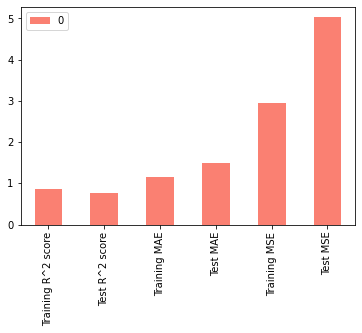

In [445]:
# Using RidgeRegression() model
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.5)
model.fit(X_train,y_train)
ridge = evaluate(model,X_train,y_train,X_test,y_test)

There is not a significant change in the the performance. Let's try some other models.

In [446]:
# Function to train a model and evaluate it
def train_model(model,X_train,y_train,X_test,y_test):
    md = model
    md.fit(X_train,y_train)
    evaluate(md,X_train,y_train,X_test,y_test)
    return md

{'Training R^2 score': 0.8204764204367729, 'Test R^2 score': 0.78972449489727, 'Training MAE': 0.9693113253846771, 'Test MAE': 1.0560372949826582, 'Training MSE': 3.7708059897508486, 'Test MSE': 4.311709171447935}


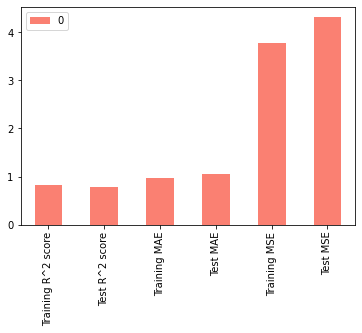

In [447]:
# Using support vector regression model in linear kernel
from sklearn.svm import SVR
linear = train_model(SVR(kernel='linear'),X_train,y_train,X_test,y_test)

This model performed better than the Ridge Regression model in all metrics except the R^2 score in training set.

{'Training R^2 score': 0.8119259068467234, 'Test R^2 score': 0.7937199615325982, 'Training MAE': 1.146311876867303, 'Test MAE': 1.2143219393914058, 'Training MSE': 3.950405393568714, 'Test MSE': 4.22978193923255}


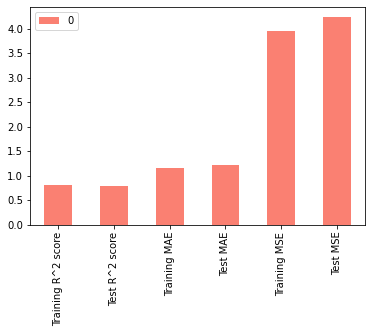

In [448]:
# Training using SVR model using 'rbf' kernel
rbf = train_model(SVR(kernel = 'rbf'),X_train,y_train,X_test,y_test)

{'Training R^2 score': 0.9853386264218016, 'Test R^2 score': 0.8297044783233832, 'Training MAE': 0.3398101265822785, 'Test MAE': 1.1135443037974686, 'Training MSE': 0.3079550632911393, 'Test MSE': 3.4919177215189876}


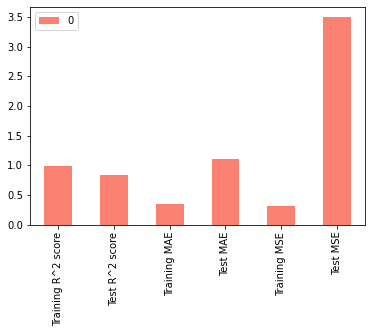

In [449]:
# Train using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
forest = train_model(RandomForestRegressor(),X_train,y_train,X_test,y_test)

The RandomForestRegressor() has performed far better than all the other models. Hence, we will go on with this model only.

### Feature Modification
From the aforementioned important points infered about the dataset, we will try to remove some redundant features and then see what kind of result are infront.

 1. Family support has been found to have no significance in predicting a student's grades. Let's remove that column and see what results are infront of us.

{'Training R^2 score': 0.9849139889969949, 'Test R^2 score': 0.8326650337573844, 'Training MAE': 0.3425, 'Test MAE': 1.1132911392405063, 'Training MSE': 0.31687436708860767, 'Test MSE': 3.4312113924050633}


RandomForestRegressor()

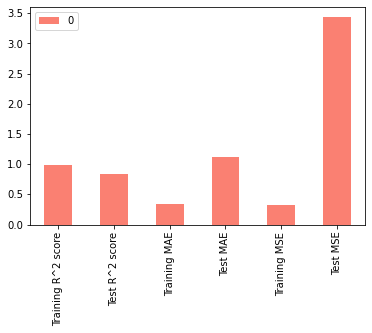

In [450]:
X = X.drop('famsup',axis = 1)
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
train_model(RandomForestRegressor(),X_train,y_train,X_test,y_test)

As, we can see, the model's performance after removing that column has improved(except for training R^2 score). Let's see how much more we can improve the model by removing more features.

2. Similar to family support, school support too had the same low significance to grades. Let's remove it and train the data.

{'Training R^2 score': 0.985483426503044, 'Test R^2 score': 0.828086167286594, 'Training MAE': 0.33528481012658223, 'Test MAE': 1.108607594936709, 'Training MSE': 0.3049136075949367, 'Test MSE': 3.525101265822785}


RandomForestRegressor()

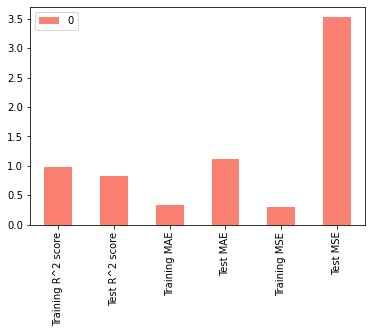

In [451]:
X = X.drop('schoolsup',axis = 1)
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
train_model(RandomForestRegressor(),X_train,y_train,X_test,y_test)

Every metric except training R^2 and test MSE has improoved. Let's remove some more features.

3. Since both male and female students didn't had much different in going out frequency and score almost similarly, along with weekend alcohol consumption. Let's remove it and find out.


{'Training R^2 score': 0.9856587956577273, 'Test R^2 score': 0.8296637967680431, 'Training MAE': 0.333259493670886, 'Test MAE': 1.0967088607594937, 'Training MSE': 0.30123006329113916, 'Test MSE': 3.492751898734176}


RandomForestRegressor()

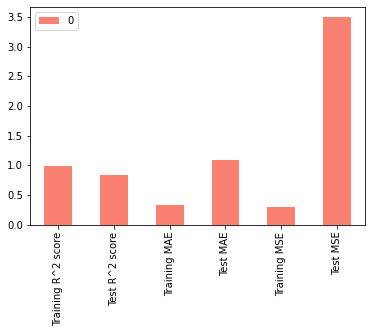

In [452]:
X = X.drop('goout',axis = 1)
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
train_model(RandomForestRegressor(),X_train,y_train,X_test,y_test)

Here also we can see some improvement in the model's performance with only minor decreses in some metrics.

3. Parent's cohabitation status didn't have much impact on a student's grades. Hence let's remove it and see what results are in front of us.

{'Training R^2 score': 0.9857418850811017, 'Test R^2 score': 0.8330865415872222, 'Training MAE': 0.3312025316455696, 'Test MAE': 1.108987341772152, 'Training MSE': 0.29948481012658223, 'Test MSE': 3.4225683544303807}


RandomForestRegressor()

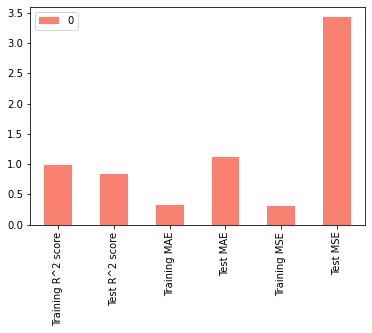

In [453]:
X = X.drop('Pstatus',axis = 1)
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
train_model(RandomForestRegressor(),X_train,y_train,X_test,y_test)

Clearly there is an improvement in metrics after removing that column.

In [454]:
X["absences"].groupby(X["absences"]>=40).count()

absences
False    391
True       4
Name: absences, dtype: int64

4. There are very few students who have made more than 40 absents. Let's remove such outliers.

{'Training R^2 score': 0.9857418850811017, 'Test R^2 score': 0.8330865415872222, 'Training MAE': 0.3312025316455696, 'Test MAE': 1.108987341772152, 'Training MSE': 0.29948481012658223, 'Test MSE': 3.4225683544303807}


RandomForestRegressor()

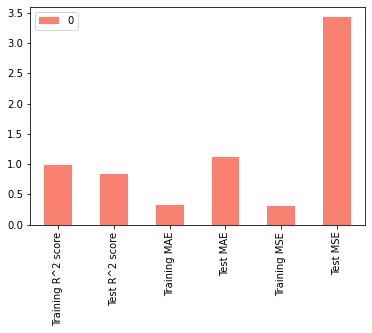

In [455]:
#X.drop(X[X.absences>=40].index,inplace = True)
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
train_model(RandomForestRegressor(),X_train,y_train,X_test,y_test)

There is not much difference in the performance of the model after removing the outliers.

5. Let's delete the dummy variable we had earlier created to analyse workday and weekend alcohol consumption as weekly alcohol consumption. Let's see whether it improves the results or not.

{'Training R^2 score': 0.9859241695658538, 'Test R^2 score': 0.8313399509267652, 'Training MAE': 0.3276898734177215, 'Test MAE': 1.109367088607595, 'Training MSE': 0.29565601265822783, 'Test MSE': 3.458382278481013}


RandomForestRegressor()

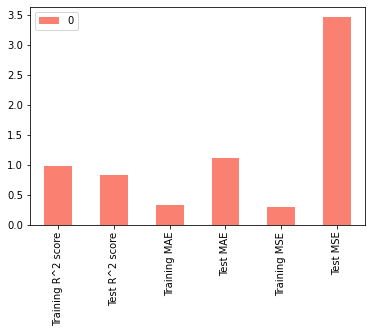

In [456]:
X = X.drop('Alc',axis = 1)
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
train_model(RandomForestRegressor(),X_train,y_train,X_test,y_test)

There is no significant change in metrics even after remove the dummy column. In fact, the subtle change that has happened is worse than the previous model.

6. We saw how the dummy column had some impact on the metrics. Let's see what happens when we remove the workday and weekend columns and just keep the dummy column.

In [457]:
# Please comment this cell while running all cells, run this cell after all cells are run
X1 = X
X1["Alc"] = X["Dalc"]+X["Walc"]
X1.drop("Dalc",axis = 1, inplace = True)
X1.drop("Walc",axis = 1,inplace = True)
np.random.seed(42)
X1_t,X1_ts,y_t,y_ts = train_test_split(X1,y,test_size = 0.2)
train_model(RandomForestRegressor(),X1_t,y_t,X1_ts,y_ts)

The test metrics have worsened a bit but the training metrics have improved. Hence the model performs a bit better with the weekend and workday numbers.

#### Conclusion
Till removing absences, the model's performance has improved, after that the training metrics start worsening. Hence we will modify the features till here only

In [458]:
X["Alc"] = X["Dalc"]+X["Walc"]
X.head()

,school,sex,age,address,famsize,Medu,Fedu,Mjob,Fjob,reason,...,romantic,famrel,freetime,Dalc,Walc,health,absences,G1,G2,Alc
0,0,0,18,1,0,4,4,0,4,0,...,0,4,3,1,1,3,6,5,6,2
1,0,0,17,1,0,1,1,0,2,0,...,0,5,3,1,1,3,4,5,5,2
2,0,0,15,1,1,1,1,0,2,2,...,0,4,3,2,3,3,10,7,8,5
3,0,0,15,1,0,4,2,1,3,1,...,1,3,2,1,1,5,2,15,14,2
4,0,0,16,1,0,3,3,2,2,1,...,0,4,3,1,2,5,4,6,10,3


#### Cross Validation Scores
Let's see how the model performs on cross validation for different metrics.

{'Training R^2 score': 0.9857418850811017, 'Test R^2 score': 0.8330865415872222, 'Training MAE': 0.3312025316455696, 'Test MAE': 1.108987341772152, 'Training MSE': 0.29948481012658223, 'Test MSE': 3.4225683544303807}


0.8265673076826653

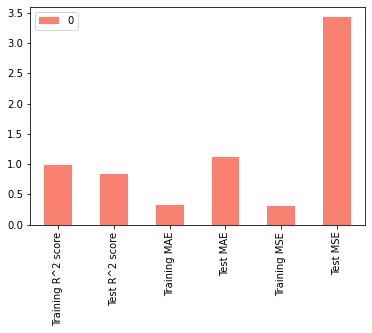

In [460]:
# Cross validating on all data for R^2,MAE and MSE
from sklearn.model_selection import cross_val_score
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
model = train_model(RandomForestRegressor(),X_train,y_train,X_test,y_test)
cross_val_score(model,X,y,cv = 5).mean()

In [463]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [465]:
cross_val_score(model,X,y,cv=5,scoring ='neg_mean_absolute_error').mean()

-1.1075949367088607

In [466]:
cross_val_score(model,X,y,cv=5,scoring ='neg_mean_squared_error').mean()

-3.342240253164557

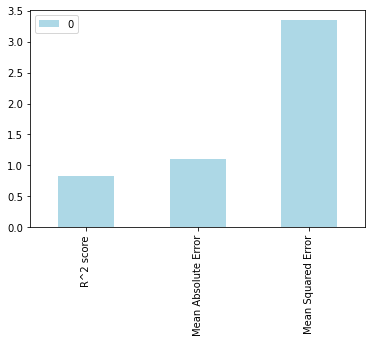

In [473]:
cross_val_scores = {
    'R^2 score' : 0.8265673076826653,
    'Mean Absolute Error' : 1.1075949367088607,
    'Mean Squared Error' : 3.342240253164557
}
cross_val_scores = pd.DataFrame(cross_val_scores,index = [0])
cross_val_scores.T.plot.bar(color = "lightblue");

### Feature Importance
Since we cannot modify data anymore and we have got the final metrics. Let's see which features have the most importances.

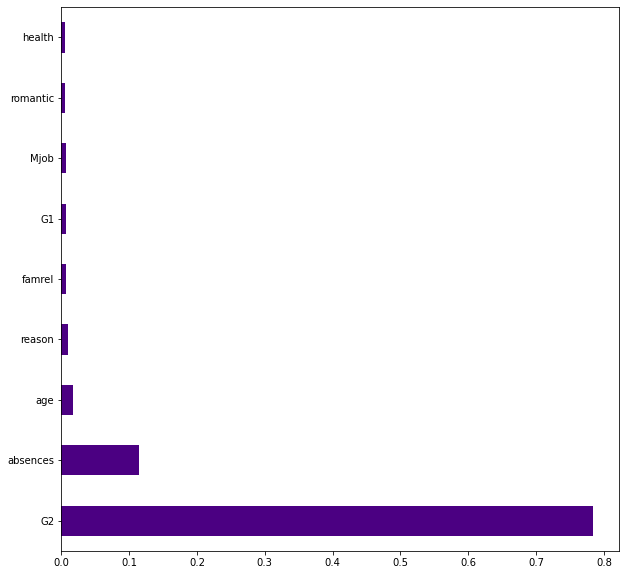

In [476]:
# Feature Importance of final model
feat_importances = pd.Series(model.feature_importances_,index = X.columns)
feat_importances.nlargest(9).plot.barh(color = 'indigo',figsize=(10,10));

Points to be noted from this graph:
    
    1. Health is important for a student's success.
    2. Romantic relationships also decide a student's grade.
    3. Mother's job contributes a lot in student's success as compared to father's job.
    4. G1 and G2 are also contributing factor, with G2 behind way more important than G1.
    5. Family relation, reason and absences (trivial features) are also contribute a lot.
    6. Age is a detrimental factor.
    
Other than point no. 3, all other features were analysed to be of higher importance. This means the data analysis was done correctly. 

# 6. Exporting the model


In [477]:
# Exporting the model using joblib
import joblib
joblib.dump(model,"model.joblib")

['model.joblib']